<a href="https://colab.research.google.com/github/FudholIsmaulidin/Machine-Learning/blob/main/H071201037_Emha_Ismaulidin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Prediksi Pemilu AS tahun 2016 : Hillary Clinton vs. Donald Trump***

# Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Load Data

In [2]:
# Load data using pandas
data = pd.read_csv("/content/2016 County Election Data.csv")

# Data Exploration



## Review Data

In [3]:
# View column names
data.columns

Index(['County', 'Population', 'Population-growth', 'Population-density',
       'Income-per-capita', 'Percent-white', 'Percent-in-poverty',
       'Bachelors-degree-or-higher', 'Clinton-lead'],
      dtype='object')

In [4]:
# Dataframe shape
data.shape

(3020, 9)

In [5]:
# Take a glimpse of the data
data.head()

,County,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead
0,"Autauga, alabama",55395,1.5,91.8,24571,75.9,12.1,20.9,-49.48
1,"Baldwin, alabama",200111,9.8,114.6,26766,83.1,13.9,27.7,-57.79
2,"Barbour, alabama",26887,-2.1,31.0,16829,46.3,26.7,13.4,-5.61
3,"Bibb, alabama",22506,-1.8,36.8,17427,74.6,18.1,12.1,-55.54
4,"Blount, alabama",57719,0.7,88.9,20730,87.8,15.8,12.1,-81.38


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   County                      3020 non-null   object 
 1   Population                  3020 non-null   int64  
 2   Population-growth           3020 non-null   float64
 3   Population-density          3020 non-null   float64
 4   Income-per-capita           3020 non-null   int64  
 5   Percent-white               3020 non-null   float64
 6   Percent-in-poverty          3020 non-null   float64
 7   Bachelors-degree-or-higher  3020 non-null   float64
 8   Clinton-lead                3020 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 212.5+ KB


In [7]:
data.describe()

,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead
count,3.020000e+03,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000
mean,1.011997e+05,0.470265,257.729934,23564.644702,77.343444,16.729603,19.775927,-31.927801
std,3.303392e+05,4.239628,1748.182131,5565.655477,19.642285,6.505702,8.837720,30.987109
min,8.600000e+01,-17.000000,0.100000,8948.000000,3.200000,0.900000,3.200000,-91.640000
25%,1.089550e+04,-2.000000,16.900000,19856.500000,65.800000,12.100000,13.700000,-55.012500
50%,2.531700e+04,-0.200000,43.900000,22902.000000,84.600000,16.000000,17.600000,-38.225000
75%,6.625575e+04,2.225000,110.625000,26205.000000,93.300000,20.400000,23.400000,-14.632500
max,1.011670e+07,72.900000,69467.500000,62498.000000,98.900000,48.000000,74.400000,80.990000


In [8]:
# Distribution of results
print('Trump Won Counties: ', len(data.loc[data['Clinton-lead'] < 0]), ', Mean Trump County Pop.: ', round(data.loc[data['Clinton-lead'] < 0]['Population'].mean(), 1))
print('Clinton Won Counties: ', len(data.loc[data['Clinton-lead'] > 0]), ', Mean Clinton County Pop.: ', round(data.loc[data['Clinton-lead'] > 0]['Population'].mean(), 1))

Trump Won Counties:  2542 , Mean Trump County Pop.:  53922.6
Clinton Won Counties:  478 , Mean Clinton County Pop.:  352619.3


Rata-rata populasi kabupaten yang dimenangkan oleh Clinton lebih besar daripada kabupaten yang dimenangkan oleh Trump.

In [9]:
# Put the election results into bins
data['Results_binned'] = pd.cut(data['Clinton-lead'], bins = np.linspace(-100, 100, num = 7))
data.head()

,County,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead,Results_binned
0,"Autauga, alabama",55395,1.5,91.8,24571,75.9,12.1,20.9,-49.48,"(-66.667, -33.333]"
1,"Baldwin, alabama",200111,9.8,114.6,26766,83.1,13.9,27.7,-57.79,"(-66.667, -33.333]"
2,"Barbour, alabama",26887,-2.1,31.0,16829,46.3,26.7,13.4,-5.61,"(-33.333, 0.0]"
3,"Bibb, alabama",22506,-1.8,36.8,17427,74.6,18.1,12.1,-55.54,"(-66.667, -33.333]"
4,"Blount, alabama",57719,0.7,88.9,20730,87.8,15.8,12.1,-81.38,"(-100.0, -66.667]"


In [10]:
# Group by the bin and review averages
data.groupby('Results_binned').mean()

,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead
Results_binned,,,,,,,,
"(-100.0, -66.667]",13053.148789,-0.013495,21.715917,23284.259516,86.593080,15.495156,16.576125,-73.250484
"(-66.667, -33.333]",34625.016370,0.106335,64.988256,22437.301779,84.012954,16.362135,16.787900,-49.931673
"(-33.333, 0.0]",99823.954009,0.578774,167.521816,24236.061321,75.644340,16.376179,21.222877,-19.099741
"(0.0, 33.333]",301910.827586,1.584770,549.509195,25684.077586,60.621264,18.093966,27.154023,13.764253
"(33.333, 66.667]",475344.754237,1.862712,1690.846610,26330.677966,41.969492,21.809322,30.071186,45.975932
"(66.667, 100.0]",616363.000000,1.050000,12329.366667,26200.666667,26.550000,24.941667,29.233333,73.574167


## Correlation 

In [11]:
data.corr()['Clinton-lead'].sort_values()

Percent-white                -0.560320
Population-growth             0.126156
Percent-in-poverty            0.165681
Income-per-capita             0.216247
Population-density            0.262241
Population                    0.344844
Bachelors-degree-or-higher    0.459850
Clinton-lead                  1.000000
Name: Clinton-lead, dtype: float64

In [12]:
data.corr()['Clinton-lead'].abs().sort_values(ascending = False)

Clinton-lead                  1.000000
Percent-white                 0.560320
Bachelors-degree-or-higher    0.459850
Population                    0.344844
Population-density            0.262241
Income-per-capita             0.216247
Percent-in-poverty            0.165681
Population-growth             0.126156
Name: Clinton-lead, dtype: float64

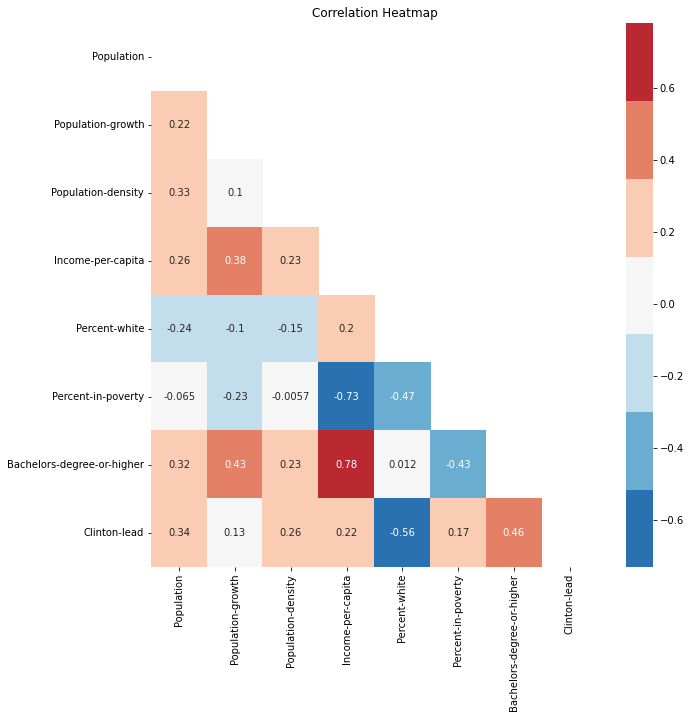

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
#heatmap = sns.heatmap(data.corr(), mask=mask, cmap=plt.cm.RdBu_r, annot=True)
heatmap = sns.heatmap(data.corr(), mask=mask, cmap=sns.color_palette("RdBu_r", 7), annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()

## Histogram

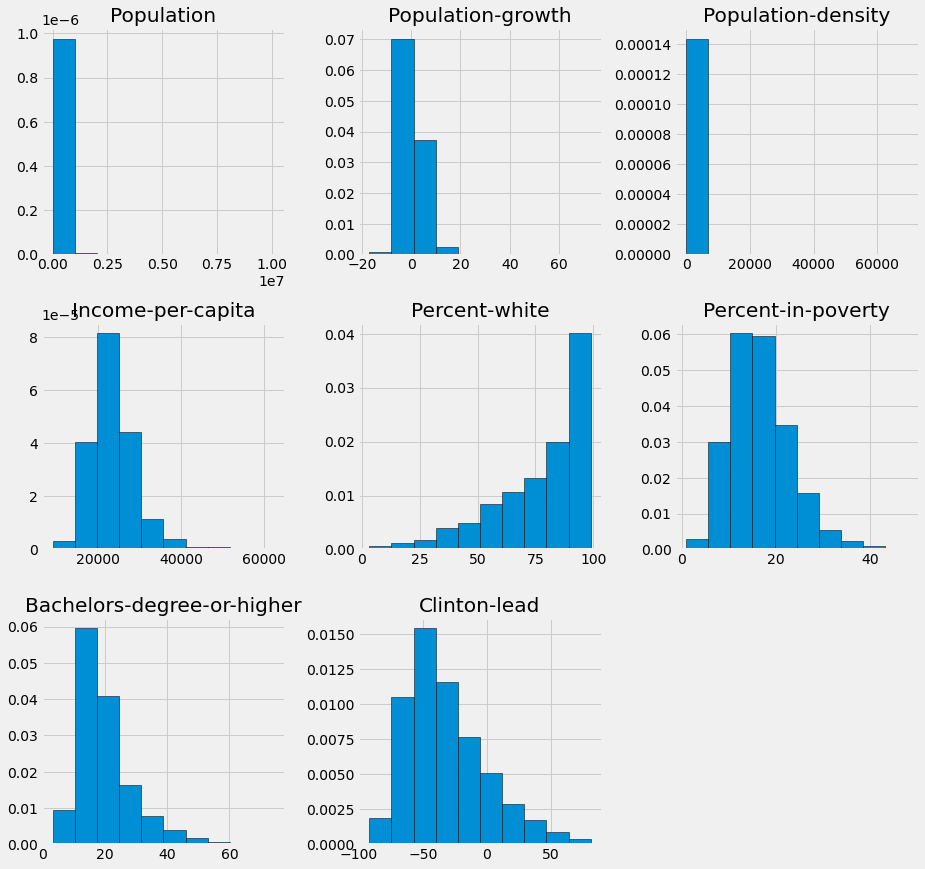

In [14]:
# Create histograms for each data column
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (14,14)
data.hist(density=True, edgecolor='k');


In [18]:
# use the column that contains Clinton's margin of victory to create a column for our labels (Trump or Clinton victory)
data.loc[data["Clinton-lead"] > 0, "Label"] = "CLINTON"
data.loc[data["Clinton-lead"] <  0, "Label"] = "TRUMP"

# we no longer need the binned results column and can drop it
data.drop(["Results_binned"], axis=1, inplace=True)

## KDE Plot

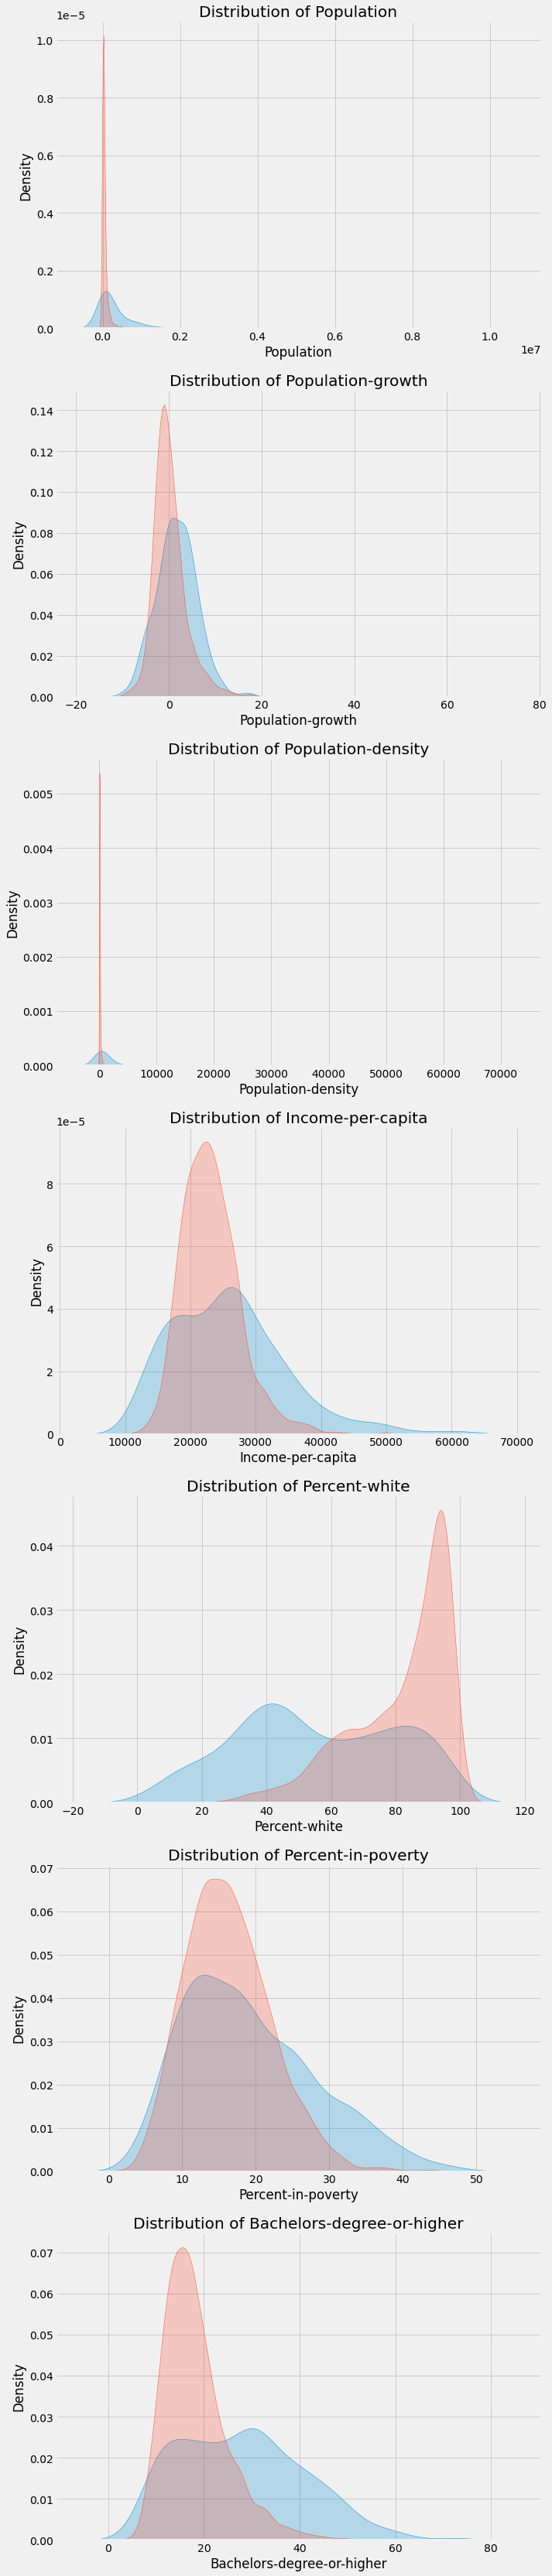

In [20]:
sns.distributions._has_statsmodels = False
num_cols = len(data.columns[1:-1])
plt.figure(figsize=(10, num_cols*8))

for i, col in enumerate(data.columns[1:-2]):
  plt.subplot(num_cols, 1, i + 1)
  sns.kdeplot(data.loc[data['Label'] == 'CLINTON', col], label='Clinton Counties', shade=True)
  sns.kdeplot(data.loc[data['Label'] == 'TRUMP', col], label='Trump Counties', shade = True)
  plt.ylabel('Density')
  plt.xlabel('%s' % col)
  plt.title('Distribution of %s' % col)

# Model Creation

In [21]:
# Simple functions we can reuse to return a trained random forest model and to split our data into training and testing datasets
def trained_model(X, y):
  model = RandomForestClassifier(random_state=7)
  model.fit(X, y)
  return model

def split_data(X, y, test_size=.2):
  # Split the data into training and test sets
  return train_test_split(X, y, test_size=test_size, random_state=5)

In [22]:
y = data['Label'].values
# Create a dataframe with the county features (X values). We exclude the county name, Clinton-lead, and Label columns.
features = data[data.columns[1:-2]]

In [23]:
# Train the model using only the features that are in the original data
X_train, X_test, y_train, y_test = split_data(features, y)
model_original_feat = trained_model(X_train, y_train)
print('Accuracy score using original features only: ', round(model_original_feat.score(X_test, y_test) * 100, 2))
print('ROC AUC score using original features: ', round(roc_auc_score(y_test, model_original_feat.predict_proba(X_test)[:, 1]) * 100, 2))

Accuracy score using original features only:  92.22
ROC AUC score using original features:  96.44


# Feature Engineering

## Feature Polynomial

In [24]:
# Create the polynomial object and fit using the original features
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)
poly_transformer.fit(features)
poly_features = poly_transformer.transform(features)
feature_names = poly_transformer.get_feature_names(input_features=features.columns)
poly_features.shape

(3020, 119)

In [25]:
X_train, X_test, y_train, y_test = split_data(poly_features, y)
model_poly_feat = trained_model(X_train, y_train)
print('Score using polynomial features: ', round(model_poly_feat.score(X_test, y_test) * 100, 2))
print('ROC AUC score using polynomial features: ', round(roc_auc_score(y_test, model_poly_feat.predict_proba(X_test)[:, 1]) * 100, 2))

Score using polynomial features:  92.55
ROC AUC score using polynomial features:  96.62


## MinMax Scaler

In [26]:
scaler = MinMaxScaler()

X = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = split_data(X, y)
model_scaled_feat = trained_model(X_train, y_train)
print('Score using MinMaxScaler on original features: ', round(model_scaled_feat.score(X_test, y_test) * 100, 2))
print('ROC AUC score using MinMaxScaler original features: ', round(roc_auc_score(y_test, model_scaled_feat.predict_proba(X_test)[:, 1]) * 100, 2))

Score using MinMaxScaler on original features:  92.38
ROC AUC score using MinMaxScaler original features:  96.4


# Prediksi Pemilu

In [27]:
def predict_winner(county, model):
    X = data[data['County'] == county][data.columns[1:-2]]
    y = data[data['County'] == county]['Clinton-lead'].values[0]
    prediction  = model.predict(X)[0]
    print(county)
    print("Predicted Winner: {0}\nClinton margin of victory: {1}\n".format(prediction, y))

In [28]:
# Select 15 random counties
random_counties = data.sample(n=15)
random_counties

,County,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead,Label
1931,"Pitt, north-carolina",175354,4.3,257.9,23029,56.6,24.3,28.1,7.38,CLINTON
2897,"Mercer, west-virginia",61785,-0.8,148.6,20391,90.6,22.2,17.7,-55.29,TRUMP
2666,"Juab, utah",10486,2.3,3.0,18108,92.8,14.7,14.6,-56.99,TRUMP
2437,"Cherokee, texas",50902,0.1,48.3,18801,61.8,24.5,15.1,-56.46,TRUMP
1715,"York, nebraska",13917,1.8,23.9,28207,92.2,8.9,24.9,-56.03,TRUMP
1408,"Lawrence, mississippi",12502,-3.3,30.0,20655,65.6,18.8,12.9,-29.88,TRUMP
852,"Winnebago, iowa",10559,-2.8,27.1,24547,93.0,11.4,18.6,-26.53,TRUMP
2326,"DeKalb, tennessee",19268,2.9,61.5,21606,89.6,19.0,13.3,-51.84,TRUMP
1380,"Claiborne, mississippi",9080,-5.4,19.7,12177,13.6,33.1,18.6,71.39,CLINTON
1640,"Clay, nebraska",6315,-3.5,11.4,23876,90.0,9.0,17.6,-64.01,TRUMP


In [29]:
# Predict the election winner for each county in the counties list
for county in random_counties['County']:
  predict_winner(county, model_original_feat)

Pitt, north-carolina
Predicted Winner: TRUMP
Clinton margin of victory: 7.38

Mercer, west-virginia
Predicted Winner: TRUMP
Clinton margin of victory: -55.29

Juab, utah
Predicted Winner: TRUMP
Clinton margin of victory: -56.99

Cherokee, texas
Predicted Winner: TRUMP
Clinton margin of victory: -56.46

York, nebraska
Predicted Winner: TRUMP
Clinton margin of victory: -56.03

Lawrence, mississippi
Predicted Winner: TRUMP
Clinton margin of victory: -29.88

Winnebago, iowa
Predicted Winner: TRUMP
Clinton margin of victory: -26.53

DeKalb, tennessee
Predicted Winner: TRUMP
Clinton margin of victory: -51.84

Claiborne, mississippi
Predicted Winner: CLINTON
Clinton margin of victory: 71.39

Clay, nebraska
Predicted Winner: TRUMP
Clinton margin of victory: -64.01

Webster Parish, louisiana
Predicted Winner: TRUMP
Clinton margin of victory: -29.1

Real, texas
Predicted Winner: TRUMP
Clinton margin of victory: -66.75

Toombs, georgia
Predicted Winner: TRUMP
Clinton margin of victory: -46.93

Mo